In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Merging 12 months of sales data into a single file.

In [2]:
# df1 = pd.read_csv("Sales_Data/Sales_January_2019.csv")

# files = [file for file in os.listdir("./Sales_Data")]

# all_months_data = pd.DataFrame()

# for file in files:
#     df = pd.read_csv("Sales_Data/"+file)
#     all_months_data = pd.concat([all_months_data, df])

# all_months_data.to_csv("All_data.csv", index=False)

In [3]:
df = pd.read_csv("All_data.csv")

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Cleaning Data and Typecasting

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# df.duplicated().sum()

In [9]:
# df.drop_duplicates(inplace=True)

In [10]:
lists = ["Quantity Ordered"]
df = df[df["Quantity Ordered"].isin(lists) == False]

In [11]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast='unsigned')
df["Price Each"] = df["Price Each"].astype(float)
df["Order Date"] = pd.to_datetime(df["Order Date"])

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\560994919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"], downcast='unsigned')
C:\Users\roben\AppData\Local\Temp\ipykernel_12076\560994919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price Each"] = df["Price Each"].astype(float)
C:\Users\roben\AppData\Local\Temp\ipykernel_12076\560994919.py:3: UserWarning: Could not infer format, so each element will be parsed individually, fallin

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### Question 1: What was the best month for sale? How much was earned that month?

In [13]:
df["Total_Sale"] = df["Quantity Ordered"]*df["Price Each"]

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\1382261129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Sale"] = df["Quantity Ordered"]*df["Price Each"]


In [14]:
df.set_index("Order Date", inplace=True)

In [15]:
Monthly_sale = df.resample("M").sum(numeric_only=True).reset_index()

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\3394766881.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Monthly_sale = df.resample("M").sum(numeric_only=True).reset_index()


In [16]:
Monthly_sale

,Order Date,Quantity Ordered,Price Each,Total_Sale
0,2019-01-31,10862,1803264.98,1813586.44
1,2019-02-28,13449,2188884.72,2202022.42
2,2019-03-31,17005,2791207.83,2807100.38
3,2019-04-30,20558,3367671.02,3390670.24
4,2019-05-31,18667,3135125.13,3152606.75
5,2019-06-30,15253,2562025.61,2577802.26
6,2019-07-31,16072,2632539.56,2647775.76
7,2019-08-31,13448,2230345.42,2244467.88
8,2019-09-30,13109,2084992.09,2097560.13
9,2019-10-31,22703,3715554.83,3736726.88


Text(0, 0.5, 'Total Sales')

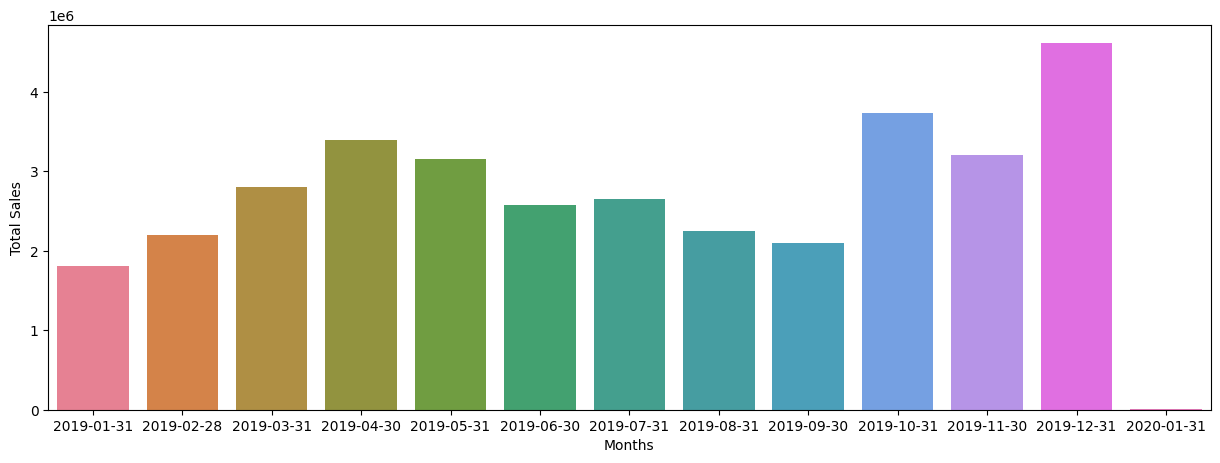

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(Monthly_sale, x="Order Date", y="Total_Sale", hue="Order Date")
plt.xlabel("Months")
plt.ylabel("Total Sales")

### Question 2: Which City has highest number of sales?

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Sale
Order Date,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99


In [19]:
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])
df

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\3412732067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Sale,City
Order Date,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles
...,...,...,...,...,...,...,...
2019-09-17 20:56:00,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles
2019-09-01 16:00:00,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",700.00,San Francisco
2019-09-23 07:39:00,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",700.00,San Francisco


In [20]:
Sale_by_City = df.groupby(by="City")["Total_Sale"].sum().reset_index()
Sale_by_City

,City,Total_Sale
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


Text(0, 0.5, 'Total Sales')

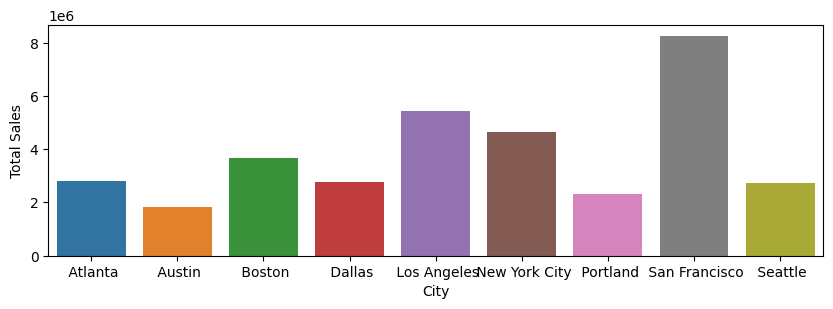

In [21]:
plt.figure(figsize=(10, 3))
sns.barplot(Sale_by_City, x="City", y="Total_Sale", hue="City")
plt.xlabel("City")
plt.ylabel("Total Sales")

### Question 3: What time should we display advertisements to maximize likelihood of customer buying product?

In [22]:
df.reset_index(inplace=True)
df["Hour"] = df["Order Date"].dt.hour
df

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\3961211835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Order Date"].dt.hour


,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Sale,City,Hour
0,2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90,Dallas,8
1,2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99,Boston,22
2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,14
3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,14
4,2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...
185945,2019-09-17 20:56:00,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",8.97,Los Angeles,20
185946,2019-09-01 16:00:00,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",700.00,San Francisco,16
185947,2019-09-23 07:39:00,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",700.00,San Francisco,7
185948,2019-09-19 17:30:00,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",379.99,San Francisco,17


In [23]:
salesby_hour = df.groupby(by="Hour")["Total_Sale"].sum().reset_index()
salesby_hour.sort_values(by="Total_Sale", ascending=False)

,Hour,Total_Sale
19,19,2412938.54
12,12,2316821.34
11,11,2300610.24
20,20,2281716.24
18,18,2219348.30
13,13,2155389.80
17,17,2129361.61
14,14,2083672.73
21,21,2042000.86
10,10,1944286.77


Text(0, 0.5, 'Total Sales')

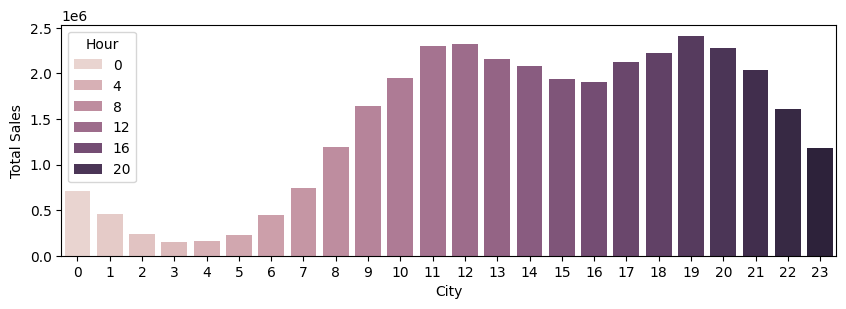

In [24]:
plt.figure(figsize=(10, 3))
sns.barplot(salesby_hour, x="Hour", y="Total_Sale", hue="Hour")
plt.xlabel("City")
plt.ylabel("Total Sales")

### Question 4: What products are most often together?

In [25]:
df1 =df[df["Order ID"].duplicated(keep=False)].reset_index()
df1

,index,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Sale,City,Hour
0,2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,14
1,3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,14
2,17,2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,19
3,18,2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles,19
4,29,2019-04-07 11:31:00,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",99.99,Boston,11
...,...,...,...,...,...,...,...,...,...,...
14644,185893,2019-09-20 20:18:00,259303,AA Batteries (4-pack),1,3.84,"106 7th St, Atlanta, GA 30301",3.84,Atlanta,20
14645,185904,2019-09-16 00:25:00,259314,Wired Headphones,1,11.99,"241 Highland St, Atlanta, GA 30301",11.99,Atlanta,0
14646,185905,2019-09-16 00:25:00,259314,AAA Batteries (4-pack),2,2.99,"241 Highland St, Atlanta, GA 30301",5.98,Atlanta,0
14647,185941,2019-09-30 13:49:00,259350,Google Phone,1,600.00,"519 Maple St, San Francisco, CA 94016",600.00,San Francisco,13


In [26]:
df1["Grouped"] = df1.groupby(by="Order ID")["Product"].transform(lambda x: ",".join(x))

In [27]:
df1

,index,Order Date,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Total_Sale,City,Hour,Grouped
0,2,2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,14,"Google Phone,Wired Headphones"
1,3,2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,14,"Google Phone,Wired Headphones"
2,17,2019-04-03 19:42:00,176574,Google Phone,1,600.00,"20 Hill St, Los Angeles, CA 90001",600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
3,18,2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,"20 Hill St, Los Angeles, CA 90001",11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
4,29,2019-04-07 11:31:00,176585,Bose SoundSport Headphones,1,99.99,"823 Highland St, Boston, MA 02215",99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
14644,185893,2019-09-20 20:18:00,259303,AA Batteries (4-pack),1,3.84,"106 7th St, Atlanta, GA 30301",3.84,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14645,185904,2019-09-16 00:25:00,259314,Wired Headphones,1,11.99,"241 Highland St, Atlanta, GA 30301",11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
14646,185905,2019-09-16 00:25:00,259314,AAA Batteries (4-pack),2,2.99,"241 Highland St, Atlanta, GA 30301",5.98,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"
14647,185941,2019-09-30 13:49:00,259350,Google Phone,1,600.00,"519 Maple St, San Francisco, CA 94016",600.00,San Francisco,13,"Google Phone,USB-C Charging Cable"


In [28]:
df2 = df1[["Order ID", "Grouped"]].drop_duplicates()

In [29]:
df2

,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
2,176574,"Google Phone,USB-C Charging Cable"
4,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
6,176586,"AAA Batteries (4-pack),Google Phone"
8,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
14638,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
14640,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
14643,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14645,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [30]:
from itertools import combinations
from collections import Counter

In [31]:
count = Counter()

for row in df1["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327),
 (('Lightning Charging Cable', 'Wired Headphones'), 253)]

### Question 5: What product sold the most? Why do you think it sold the most?

In [32]:
groupby_product = df.groupby("Product")["Quantity Ordered"].sum().reset_index()
groupby_product.sort_values(by="Quantity Ordered", ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


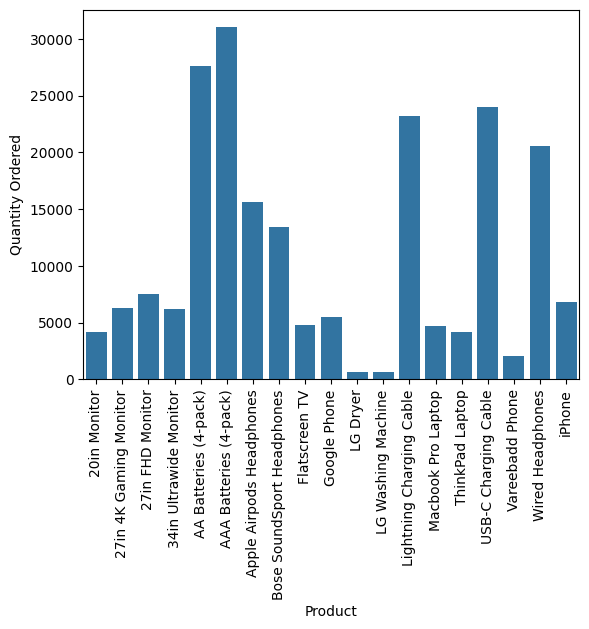

In [33]:
sns.barplot(groupby_product, x="Product", y="Quantity Ordered")
plt.xticks(groupby_product["Product"], rotation="vertical")
plt.show()

C:\Users\roben\AppData\Local\Temp\ipykernel_12076\4081399594.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(groupby_product["Product"], rotation="vertical", size=8)


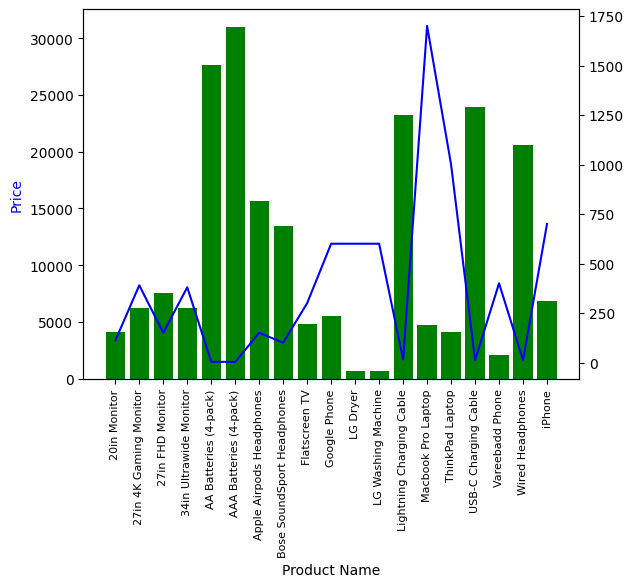

In [34]:
prices = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(groupby_product["Product"], groupby_product["Quantity Ordered"], color="g")
ax2.plot(groupby_product["Product"], prices, "b-")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax1.set_ylabel("Price", color="b")
ax1.set_xticklabels(groupby_product["Product"], rotation="vertical", size=8)
plt.show()

In [35]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64